In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("housing_price_dataset.csv")

In [3]:
df.head(3)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.2836
1,2459,3,2,Rural,1980,195014.2216
2,1860,2,1,Suburb,1970,306891.0121


In [10]:
#en_data=df["Neighborhood"].value_counts()
en_data

,count
Neighborhood,
Suburb,16721
Rural,16676
Urban,16603


In [11]:
#pd.get_dummies(en_data)

,16603,16676,16721
Neighborhood,,,
Suburb,False,False,True
Rural,False,True,False
Urban,True,False,False


In [7]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le=LabelEncoder()


In [22]:
df['Neighborhood']=le.fit_transform(df['Neighborhood'])

In [23]:
print(df.head(3))

   SquareFeet  Bedrooms  Bathrooms  Neighborhood  YearBuilt        Price
0        2126         4          1             0       1969  215355.2836
1        2459         3          2             0       1980  195014.2216
2        1860         2          1             1       1970  306891.0121


In [24]:
df.corr()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
SquareFeet,1.000000,-0.002638,-0.003275,0.011186,0.000482,0.750720
Bedrooms,-0.002638,1.000000,0.007405,-0.004208,0.003147,0.072624
Bathrooms,-0.003275,0.007405,1.000000,0.001613,0.003748,0.028418
Neighborhood,0.011186,-0.004208,0.001613,1.000000,-0.000174,0.016429
YearBuilt,0.000482,0.003147,0.003748,-0.000174,1.000000,-0.002288
Price,0.750720,0.072624,0.028418,0.016429,-0.002288,1.000000


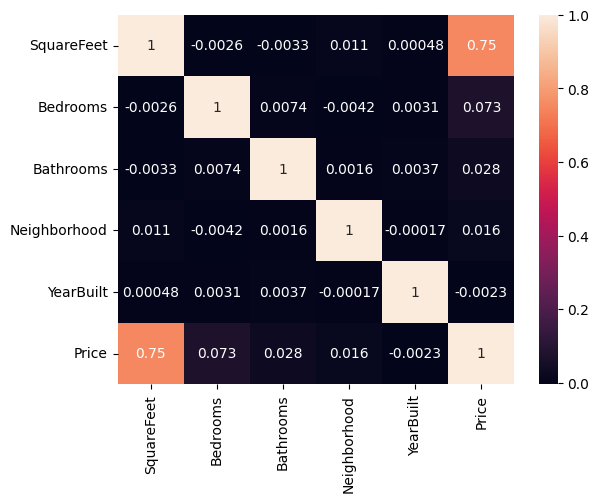

In [25]:
sns.heatmap(data=df.corr(),annot=True) # As we see there is no correlation seen between this data but good
# correlation between squarefeet nad price
plt.show()

In [26]:
x=df.iloc[:,:-1]
y=df["Price"]

In [30]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [31]:
x

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
0,0.207861,0.449067,-1.220113,-1.223957,-0.791751
1,0.786480,-0.446738,0.005614,-1.223957,-0.260842
2,-0.254340,-1.342543,-1.220113,0.001790,-0.743486
3,0.499777,-1.342543,-1.220113,1.227536,0.511390
4,0.214811,1.344872,0.005614,0.001790,0.752713
...,...,...,...,...,...
49995,-1.258671,1.344872,1.231341,-1.223957,-0.502164
49996,1.472831,-1.342543,0.005614,0.001790,0.125274
49997,1.690031,1.344872,1.231341,0.001790,-1.129602
49998,1.024531,1.344872,0.005614,-1.223957,-0.067784


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
#LinearRegression

In [33]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [34]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
lr.score(x_test,y_test)*100

57.54227349648926

In [38]:
lr.coef_

array([57176.25525172,  5840.21568935,  2419.82562579,   577.23246766,
        -121.33629124])

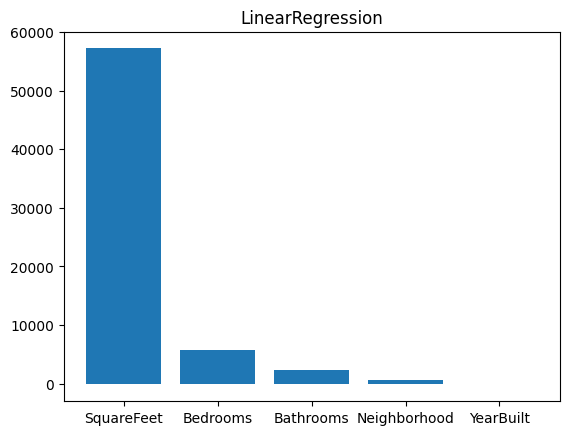

In [43]:
plt.bar(x.columns,lr.coef_)
plt.title('LinearRegression')
plt.show()

In [45]:
#lasso

In [50]:
la=Lasso(alpha=0.5) # changing the value of alpha
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

57.54228445644435

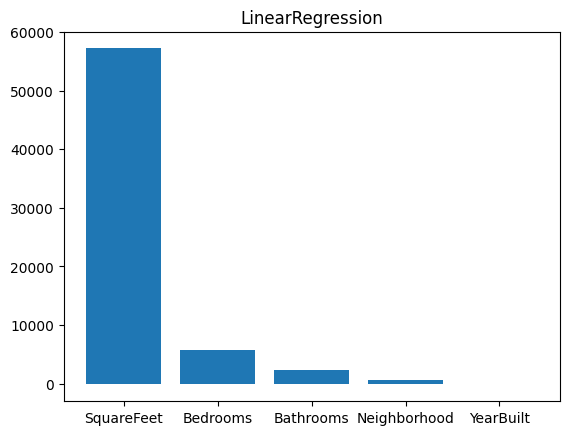

In [52]:
plt.bar(x.columns,la.coef_)
plt.title('LinearRegression')
plt.show()

In [55]:
#Ridge

In [56]:
ri=Ridge(alpha=10) # changing the value of alpha
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

57.54232371633774

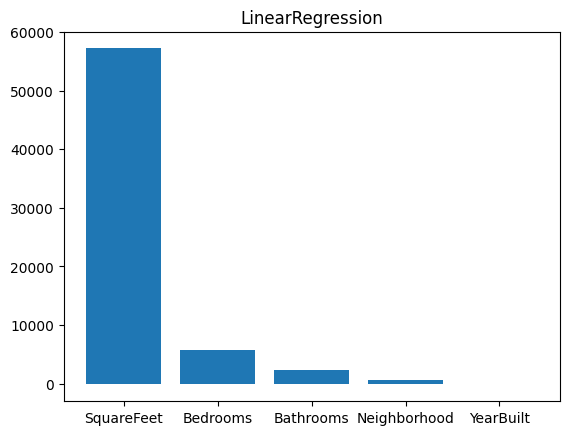

In [54]:
plt.bar(x.columns,ri.coef_)
plt.title('LinearRegression')
plt.show()

In [ ]:
using lasso and ridge regulaziation their is not change in coefficient aur alph value


In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
# root means square is not in metric it show in numpy

In [63]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

2437053699.870881
39433.36167011807
49366.52408131325


In [65]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

2437053070.7745705
39433.36261258432
49366.5177096235


In [64]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

2437050817.274999
39433.31132860848
49366.49488544836
